<a href="https://colab.research.google.com/github/Bikomwangi/Detecting-Hypothyroidism/blob/master/Detecting_Hypothyroidism_Biko_Mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

# Business Objective

The goal of this analysis is to develop a prediction model that can accurately preedict whether or not patient's symptoms indicate that the patient has hypothyroid.

# Defining the Metrics for Success

The model will be considered a success when i will have successfully incorporated advanced decision trees models. Also, applying Polynomial, linear and rbf kernel functions to build an SVM model and then evaluate their performance and pick the kernel that performs the best.

# Understanding the Context

Hypothyroidism is one of the most common diseases worldwide, and levothyroxine is the usual medication prescribed to manage it. Hypothyroidism occurs when the thyroid gland, located in the neck, does not produce enough thyroid hormone for the body’s requirements. This can result in heart disease, infertility, and poor brain development in children. People with hypothyroidism may have changes in body weight, and feel tired, weak or unhappy, all of which can reduce their quality of life. 
This research aims machine learning algorithms to form a prediction model that can identify whether or not a patient has a hypothyroid condition based on their symptoms. The model was trained on thyroid patients' data that was collected by Nairobi Hospital. This dataset contains useful information and multiple dimension features that can allow us to train a hypothyroid classification model successfully. Patient's records in the data include age, sex and a classification of a whether or not the patient has hypothroidsm.

# Steps and Experimental Design

Below are the steps which we will be basically following:
- Step 1: Reading and Understanding the Data
- Step 2: Feature Exploration

Missing Value check

Data type check
- Step 3: Exploratory data anlysis and Data Visualization

- Step 4: Data Preparation

Converting categorical variables into numeric
- Step 5: Splitting the Data into Training and Testing Sets

Rescaling
- Step 6: Building a our Models
- Step 7: Model Evaluation

# Data Relevance

The data available for this project was sourced from clinical camp that was testing for Hypothyroidism and was facilitated by Nairobi Hospital.
Some of the attributes available in the dataset include Age Sex
on_thyroxine, query_on_thyroxine, on_antithyroid_medicationthyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, and tumor among others.

# Importing Libraries

In [1]:
# importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
# filterning warnings
import warnings
warnings.filterwarnings("ignore")
print('Done')

Done


# Reading the Data

In [2]:
# reading the data from csv and creating a dataframe
df = pd.read_csv('/content/hypothyroid.csv')


# Checking the Data

In [3]:
# previewing a sample of the data
df.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2623,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.60,y,88,y,0.80,y,111,n,?
374,negative,68,M,t,f,f,f,f,f,f,f,f,f,f,y,1.60,y,2.10,y,120,y,1.10,y,109,n,?
2554,negative,34,F,f,f,f,f,f,f,t,f,f,f,f,y,0.05,y,4.20,y,213,y,1.94,y,110,n,?
1336,negative,66,F,t,f,f,f,f,f,f,f,f,f,f,y,0.25,y,1.60,y,153,y,0.86,y,176,n,?
1397,negative,20,F,t,f,f,f,f,f,f,f,f,f,f,y,0,n,?,y,121,y,0.91,y,133,n,?


In [4]:
# previewing the top five record
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# previewing the bottom five
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# previewing the dimensions of dataframe
print("Rows: {}   Columns: {}".format(*df.shape))

Rows: 3163   Columns: 26


In [7]:
# previewing the columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
# descriptive statistics
df.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


# Feature Exploration

In [9]:
# % of missing values
(df.isna().sum() / df.shape[0]) * 100

status                       0.0
age                          0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
thyroid_surgery              0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
pregnant                     0.0
sick                         0.0
tumor                        0.0
lithium                      0.0
goitre                       0.0
TSH_measured                 0.0
TSH                          0.0
T3_measured                  0.0
T3                           0.0
TT4_measured                 0.0
TT4                          0.0
T4U_measured                 0.0
T4U                          0.0
FTI_measured                 0.0
FTI                          0.0
TBG_measured                 0.0
TBG                          0.0
dtype: float64

There are no missing values observed

In [10]:
# unique values in status column
print(df['status'].unique())
print(df['status'].value_counts())

['hypothyroid' 'negative']
negative       3012
hypothyroid     151
Name: status, dtype: int64


In [11]:
# unique values in age column
df['age'].value_counts()

?     446
60     64
59     64
62     63
28     60
     ... 
90      1
5       1
7       1
93      1
97      1
Name: age, Length: 93, dtype: int64

In [12]:
# unique values in 'TBG' column
df['FTI'].value_counts()

?       247
98       55
107      55
96       54
105      48
       ... 
612       1
359       1
8.50      1
244       1
175       1
Name: FTI, Length: 281, dtype: int64

In [13]:
# dropping the age and TBG column because it has alot of '?' variable

df = df.drop(['age'], axis=1)
df.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [14]:
# replacing '?' in numerical variables with zero 
df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']] = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].replace(['?'],'0')
df.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,0


In [15]:
# converting from numeric to categorical variable type
df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']] = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].astype(float)

In [16]:
df.dtypes

status                        object
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [17]:
# creating list of numeric and categorical columns
col_numeric = list(df.select_dtypes(exclude="object"))

col_categorical = list(df.select_dtypes(include="object"))


# Exploratory Data analysis

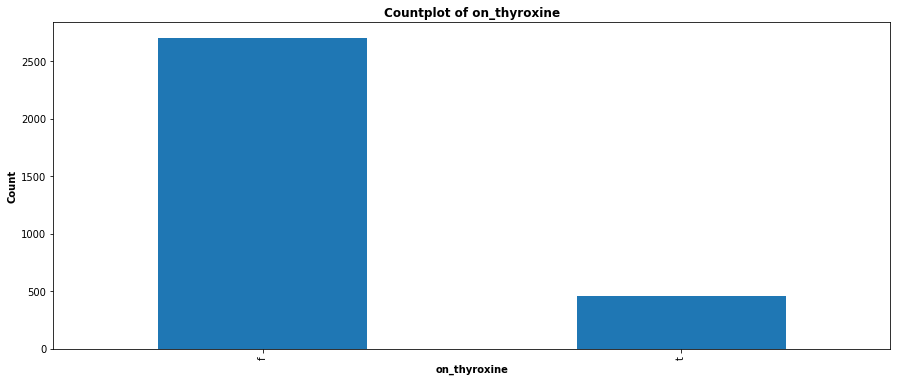

In [18]:
# visualizing the on_tyroxine
plt.figure(figsize=(15,6))
df["on_thyroxine"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("on_thyroxine", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of on_thyroxine", fontweight="bold")
plt.show()

Insights;
- It seems that most people are not on thyroxine

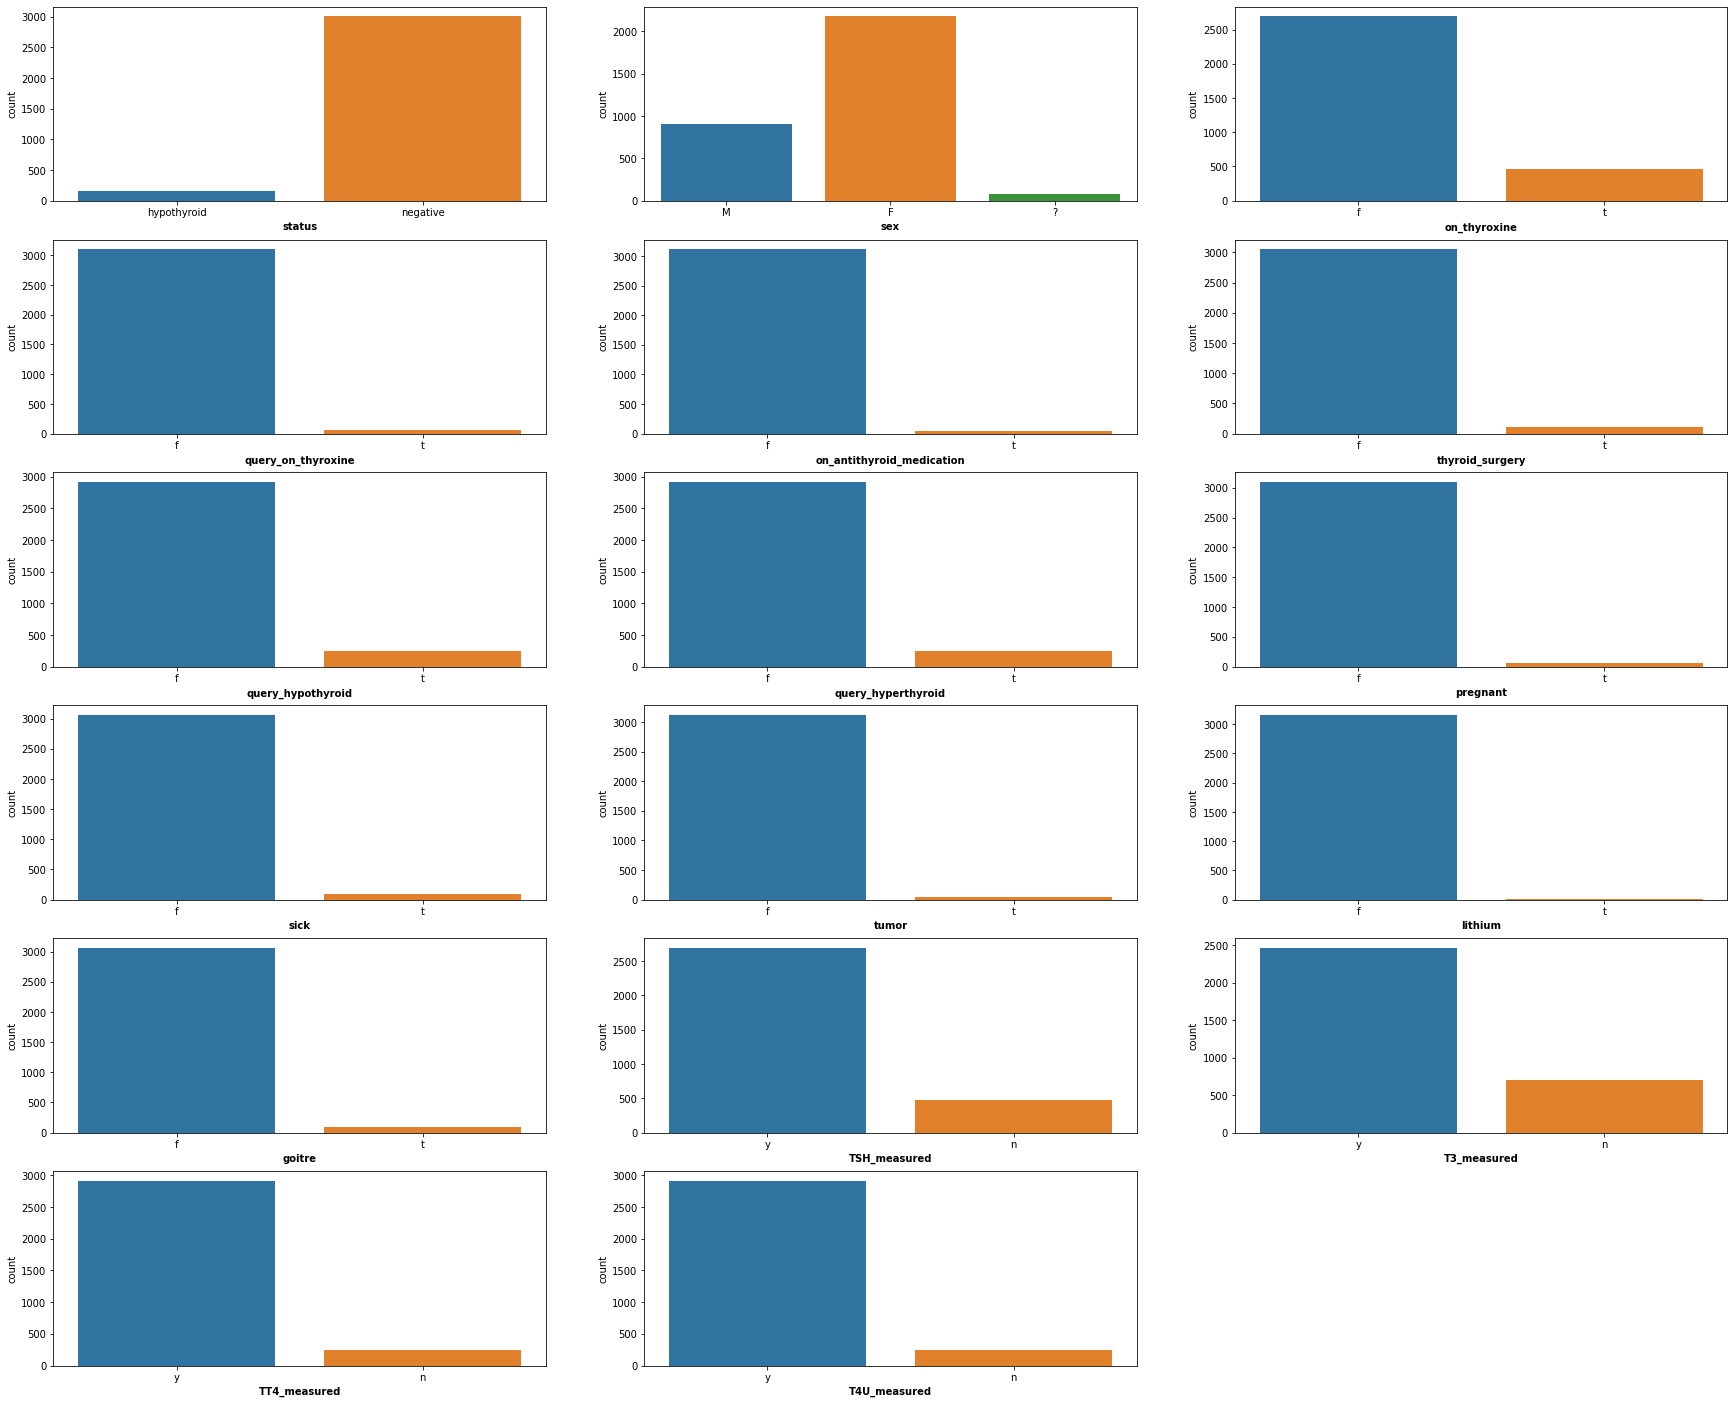

In [19]:
# visualizing the other categorical variables
plt.figure(figsize=(30,25))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(6,3,i)
    sns.countplot(df[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

Insights;
- Status: few people had hypothyroid with majority of the people being negative
- Sex: Majority of the people were female
- thyroid_surgery: most people have never had thyroid surgery
- on_antithyroid_medication: very few people are on antithyroid medication
- query_on_thyroxine: most people had no query on thyroxine
- TT4_measured: most people had their TT4 measured
- T4U_measured: most had T4U_measured yes
- goitre: most people had no goitre
- TSH_measured: most had TSH_measured yes
- T3_measured: most had T3 measured yes
- most had tumor, lithium, sick as false
- pregnancy: majority of the people were not pregnant
- query_hypothyroid & query_hyperthyroid: most people had false



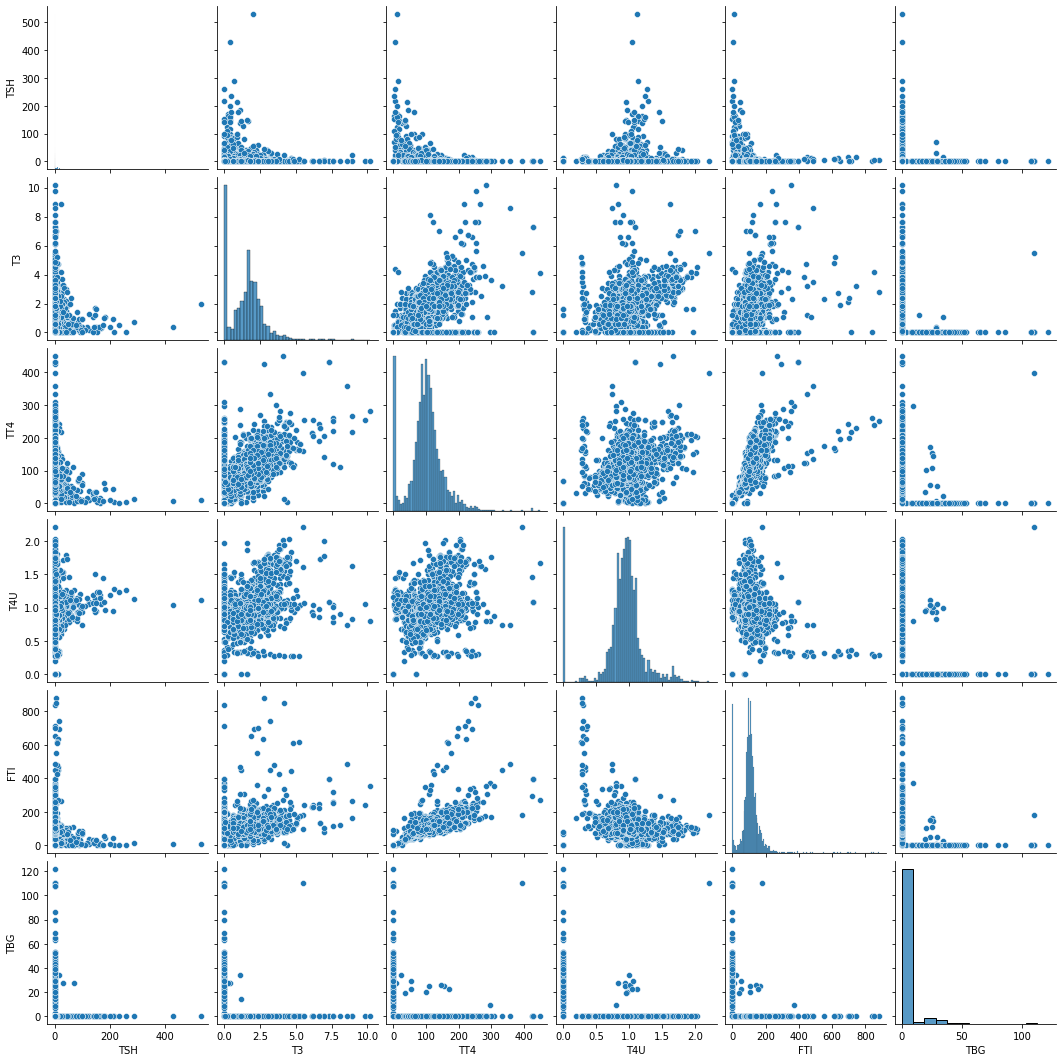

In [20]:
# pair plot to understand the correlation between the numeric variables
sns.pairplot(df[col_numeric])
plt.show()

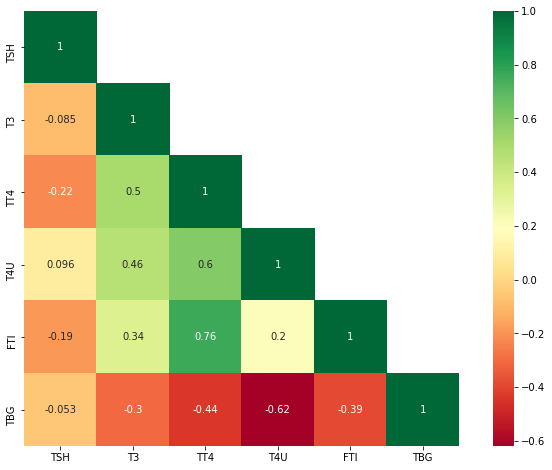

In [21]:
# heatmap to visualize the pearson's correlation matrix between the numeric variables (except price)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.corr(), k=1))
plt.show()

Insights;
- FTI & TT4, T4U & TT4, TT4 & T3 are positively correlated

# Data Preparation

Applying label encoding since I will be using a tree based model.

In [22]:
# converting categorical variables into numeric variables using label encoding
le = LabelEncoder()

df_encoded = df.drop(columns=["TBG_measured"])
df_encoded[col_categorical[:-1]] = df_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

df_encoded.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG
0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0.0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0.0
2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0.0
4,0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0.0


# Creating Dependent and Independent Variables

In [23]:
# independent variables
X = df_encoded.drop(columns="status")

# dependent variable
y = df_encoded["status"]

# Splitting data into train test data

In [24]:
# splitting into train and test data
# I will train using 90% of the data to enhanced accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling

# Decision Trees

**Building Base Model**

In [25]:
# building a base model
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9410999628390933


**Hyperparameter Tuning**

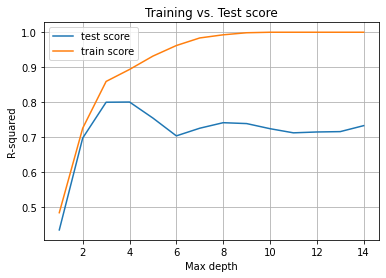

In [27]:
# hyperparameter tuning for best model
parameters = {"max_depth":list(range(1,15))}

base_model = DecisionTreeRegressor()
cv_model = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='r2', return_train_score=True, cv=5).fit(X_train,y_train)

pd.DataFrame(cv_model.cv_results_)#[["mean_test_score","mean_train_score"]]

# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

Observations:
- There is no improvement in training score after max depth 8, so we build our model with max depth 8

In [28]:
# The random_state variable is here to guarantee that we see the same numbers.
# Import the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=8)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


In [29]:
from sklearn import metrics

# And now we assess the errors
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('R-Squared:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.015111033124783605
MSE: 0.005784384637258348
R-Squared: 0.07605514208295418


In [30]:
# evaluating our model
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.8861809885293346


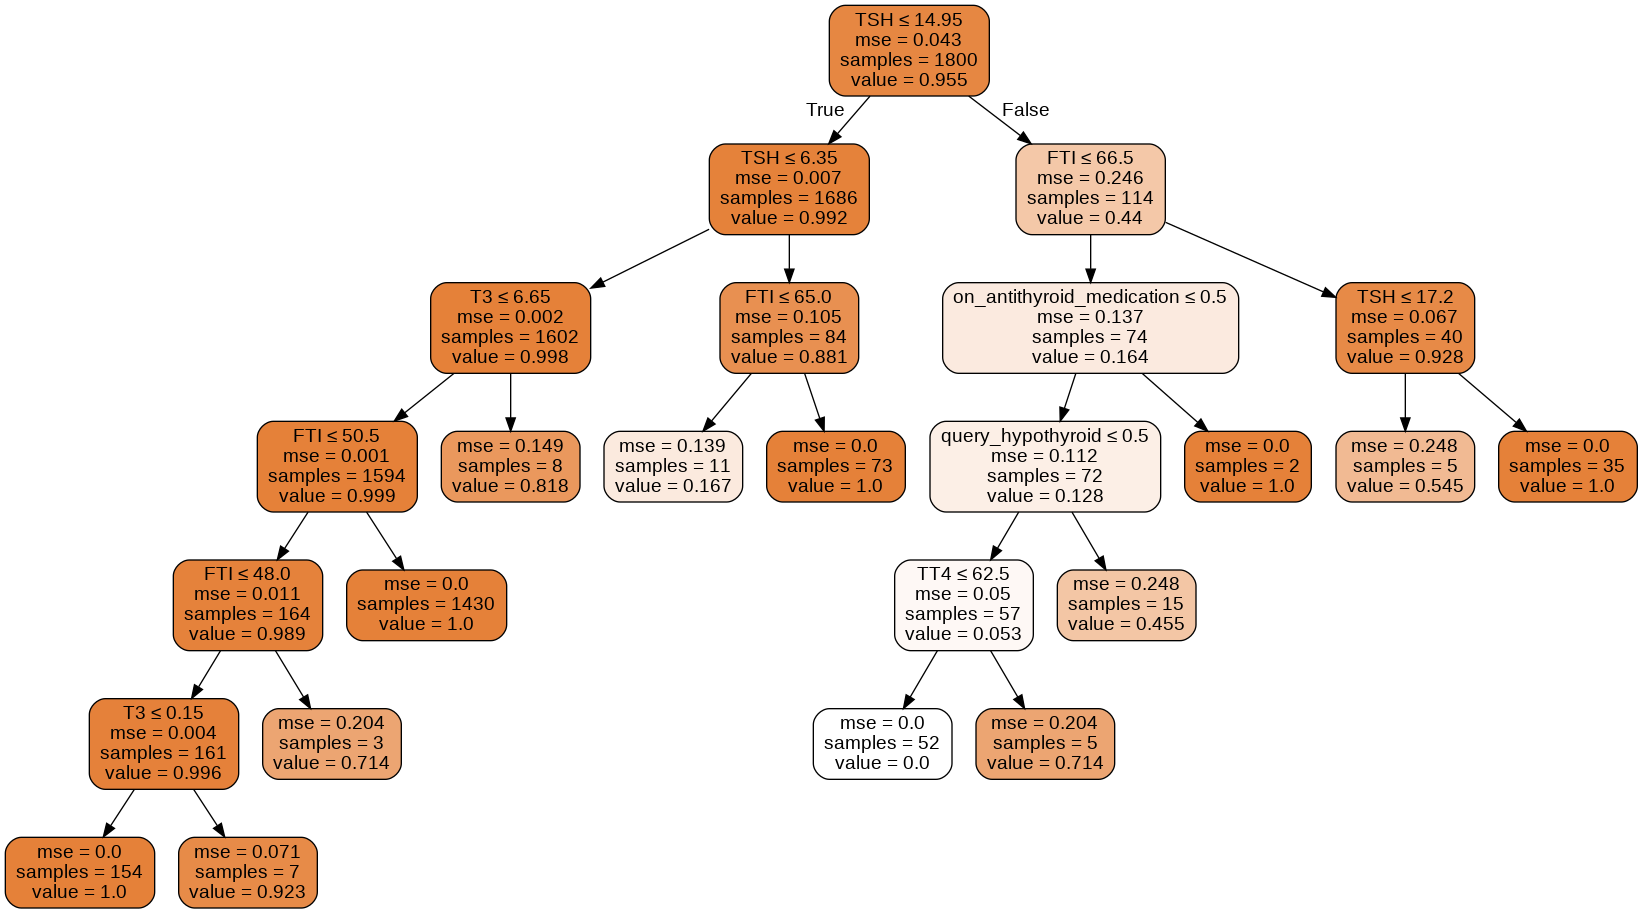

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]
test_features = df_encoded.columns.to_list()
test_features.remove('status')

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

In [32]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# connecting each feature with its importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

# sorting the values in descending order, to obtain the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.551
Variable: FTI                  Importance: 0.3514
Variable: on_antithyroid_medication Importance: 0.0346
Variable: TT4                  Importance: 0.0314
Variable: query_hypothyroid    Importance: 0.0274
Variable: T3                   Importance: 0.0041
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Variable: T4U_measured         Importance: 0.0
Variable: T4U                  Importa

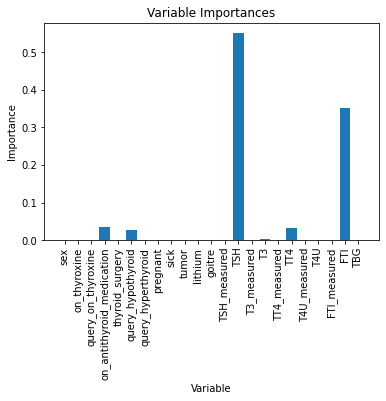

In [33]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The implications shown here are exemplar.
- While predicting whether or not someone has hypothyroid we can use the first 5 variables that are displayed in the feature importance rankings
- the first 5 most important varibles for the prediction are; TSH, FTI, on_antithyroid_medication, TT4, and query_hypothyroid

# Support Vector Machine (SVM)

Data Standardisation
- Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [34]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Running SVM with default hyperparameter

In [35]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score:
0.9779179810725552


Default Linear Kernel

In [36]:
# finding the accuracy of linear kernel
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9747634069400631


Default Polynomial Kernel

In [37]:
# accuracy of the default polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9463722397476341


Default RBF Kernel

In [38]:
# accuracy of the RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


**Performing K-fold cross validation with the 3 different kernels**

In [39]:
# cross validation on linear kernel
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.98107256 0.99369085 0.97791798 0.97468354 0.98734177 0.9778481
 0.97468354 0.98417722 0.97468354 0.99367089]


We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the dataset got split.

In [40]:
# calculating the mean of the scores
print(scores.mean())

0.9819769995607555


In K-fold cross validation we take the average of all the different scores





In [41]:
# cross validation on RBF kernel
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
RBF_scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
print(RBF_scores)

[0.97476341 0.99053628 0.98107256 0.97468354 0.98417722 0.98417722
 0.98101266 0.97151899 0.97468354 0.9778481 ]


In [42]:
# finding the average of all the different rbf scores
RBF_scores.mean()


0.9794473505570419

In [43]:
# cross validation on polynomial kernel
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
poly_scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(poly_scores)

[0.96214511 0.98422713 0.97160883 0.9778481  0.98101266 0.95886076
 0.97468354 0.97468354 0.96518987 0.97151899]


In [44]:
# calculating the mean on the different polynomial scores
poly_scores.mean() 

0.9721778540909636

From the K-fold cross validation I just did we can see different score in each kernel.This is because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.
With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy scores.

Taking all the values of C and checking out the accuracy score with kernel as linear.
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

In [45]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9819769995607555, 0.9822924569740046, 0.981976001277802, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9826089126702072, 0.9826089126702072, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9819769995607555, 0.9819769995607555, 0.9819769995607555, 0.9819769995607555, 0.9819769995607555, 0.9819769995607555]


Text(0, 0.5, 'Cross-Validated Accuracy')

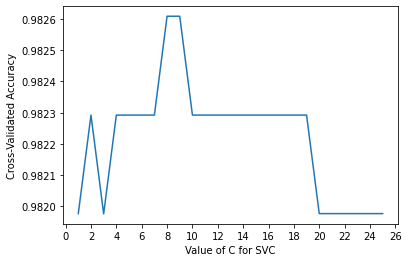

In [46]:
# visualzing the various score with respect to the value of C
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

From the above plot we can see that accuracy has been close to 98.00% for C=1 and C=3 and then it drops around 98.23% and further to 98.26% for C=9.

I'll be exploring more on what is the exact value of C which is giving us a good accuracy score

In [47]:
# finding the best value of c
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.980394721079743, 0.9810286307551012, 0.9816615421475063, 0.9813450864513037, 0.981346084734257, 0.9810296290380546, 0.9813450864513037, 0.9813440881683505, 0.9816605438645529, 0.9819769995607555, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.9822924569740046, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.981976001277802, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.9822924569740048, 0.982292456974004

Text(0, 0.5, 'Cross-Validated Accuracy')

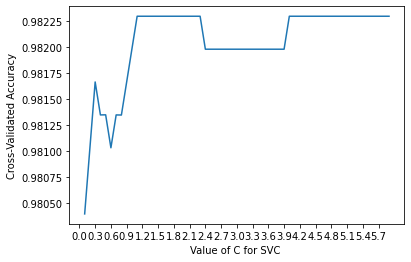

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

According the graph above; our model does not give an exact value of C for SVM

**Taking kernel as rbf with values gamma**

Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel, which is used as similarity measure between two points. A small gamma value defines a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other

In [49]:
# specifying the gamma range and calculating the accuracy score
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9525765683025196, 0.9645909036457294, 0.9788134408816834, 0.9753384179211757, 0.9702791199137485, 0.9570029549175418, 0.9563700435251368]


Text(0, 0.5, 'Cross-Validated Accuracy')

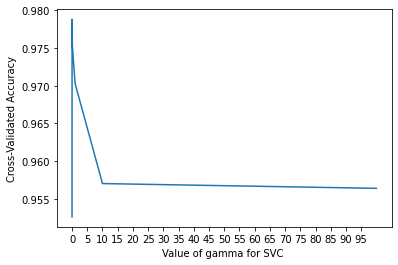

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

We can see that for gamma=10 and 100 the kernel is performing poorly.We can also see a slight improvement in accuracy score when gamma is 1

In [51]:
# look into more details for the range 0.0001 to 0.1
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9525765683025196, 0.9645909036457294, 0.9788134408816834, 0.9753384179211757]


Text(0, 0.5, 'Cross-Validated Accuracy')

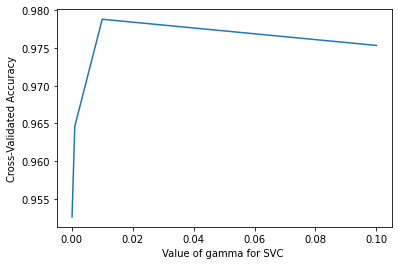

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

The score increases steadily and reaches its peak at 0.01 and then decreases till gamma=0.1.Thus Gamma should be around 0.01.

**Taking polynomial kernel with different degree**

In [53]:
# specifying the polynomial kernel degrees and calculating the accuracy scores
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9740715968534122, 0.9721778540909636, 0.9642774427983868, 0.9639629836680911, 0.960802419837879]


Text(0, 0.5, 'Cross-Validated Accuracy')

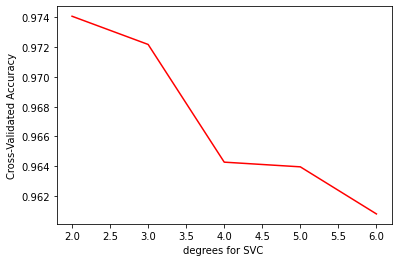

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Score is high for second degree polynomial and then there is drop in the accuracy score as degree of polynomial increases. This indicates that an increase in polynomial degree results in high complexity of the model and and maybe leading to overfitting.

**Performing SVM by using the above Hyperparameters**

In [55]:
# Now performing SVM by taking hyperparameter C=1.2 and kernel as linear
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=1.2)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9747634069400631


In [56]:
# SVM With K-fold cross validation(where K=10)
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
# taking the mean of all the scores
scores.mean()

0.980394721079743

The accuracy is slightly good without K-fold cross validation but it may fail to generalise the unseen data.Hence it is advisable to perform K-fold cross validation where all the data is covered so it may predict unseen data well.

In [57]:
# performing SVM by taking hyperparameter gamma=0.01 and kernel as rbf
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9747634069400631

In [58]:
# SVM with K-fold cross validation(where K=10)
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.98107256 0.99369085 0.97791798 0.97468354 0.98734177 0.9778481
 0.97468354 0.98417722 0.97468354 0.99367089]
0.9819769995607555


In [59]:
# performing SVM by taking hyperparameter degree=2 and kernel as poly
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9463722397476341


In [60]:
# SVM with k-fold cross validation where K=10
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print(scores.mean())

0.9721778540909636


**Performing Grid search technique to come up with the best parameter**

In [61]:
from sklearn.svm import SVC
svm_model= SVC()


In [62]:
# specifying the tuned parameters
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [63]:
# incoporating grid search
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

# Challenging the Solution


The accuracy of these models was highly dependent on the particular test-train split I choose. But since all of the tuning is only on a single split, I find it difficult to distinguish whether the hyper-parameters I chose are better in general or just better on that particular split. At a minimum one could tune the hyper-parameters on a single 10-fold CV of the data. Even better, one could average accuracy over multiple iterations.

# Follow up Questions

# a) Did we have the right Data

Yes, the dataset available for this analysis was relevant to the research problem. However, a description of the variables was not provided which made it difficult to interpret some of the variables

# b) Do we need other data to answer the research question?

No, the dataset provided had relevant information for the research question. However, a detailed explanation of the dataset constituents would have been extremely useful.

# c) Did we have the right question?

Yes, the research question was clear and focused. In other words, the question clearly stated what I needed to do.